<a href="https://colab.research.google.com/github/vladyslavBrothervinn/python-for-big-data-and-data-science/blob/main/practice_10/python_practice_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [6]:
df = pd.read_csv(data_path, sep=',',  header=0, na_values=np.nan)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

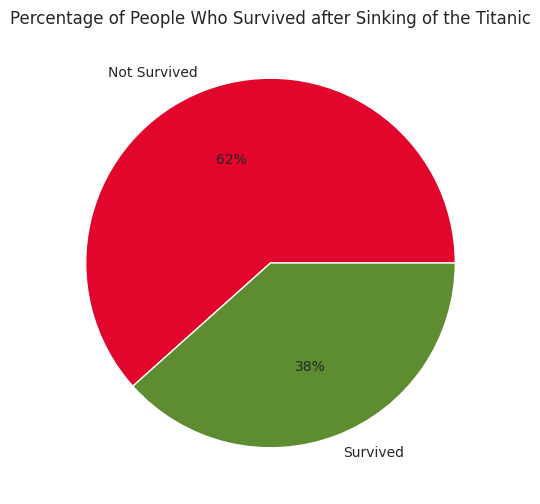

In [16]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(pd.crosstab(index=df['Survived'], columns='amount')['amount'], labels=['Not Survived', 'Survived'], autopct='%.0f%%', colors=['#E2062C', '#5E8C31'])



plt.title("Percentage of People Who Survived after Sinking of the Titanic")
plt.show()


*прокоментуйте отримані візуалізації

отримали пайчарт, який вказує співвідношення(додатково у відсотках) вишивжих(38%) до загиблих(62%)

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


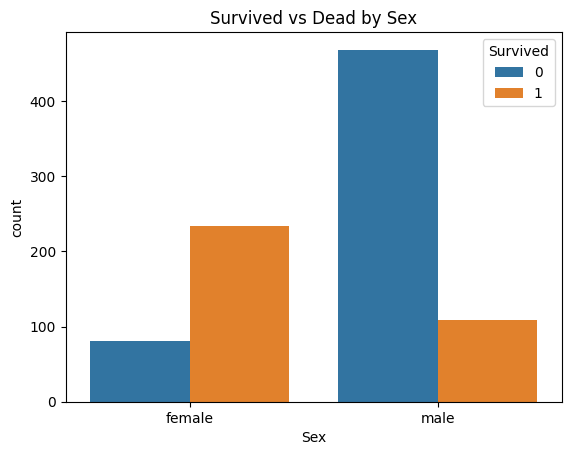

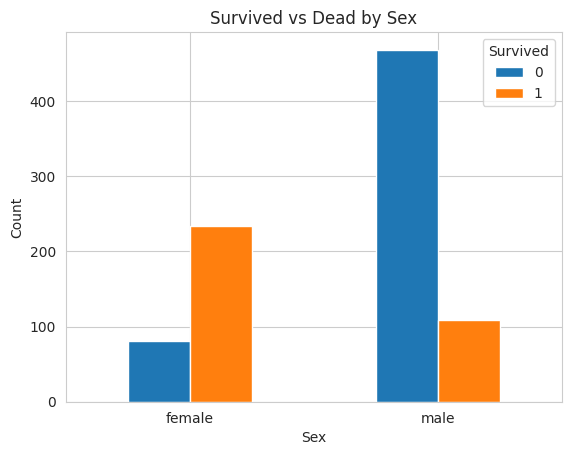

In [42]:
pd.crosstab(index=df['Sex'], columns=df['Survived']).plot(kind='bar')

plt.xticks(rotation=0)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived vs Dead by Sex')

plt.show()

*прокоментуйте отримані візуалізації

барплот показє за статтю кількість виживших та загиблих

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

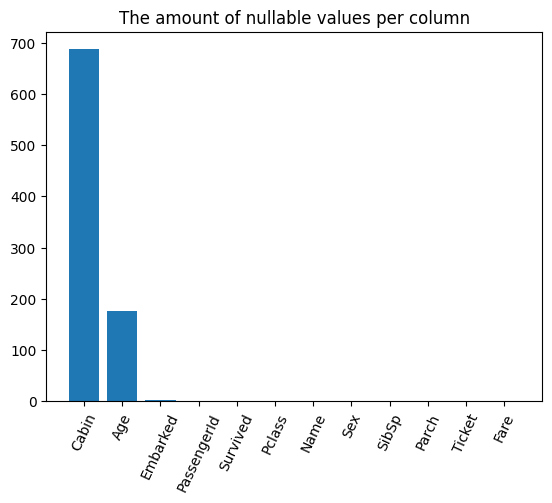

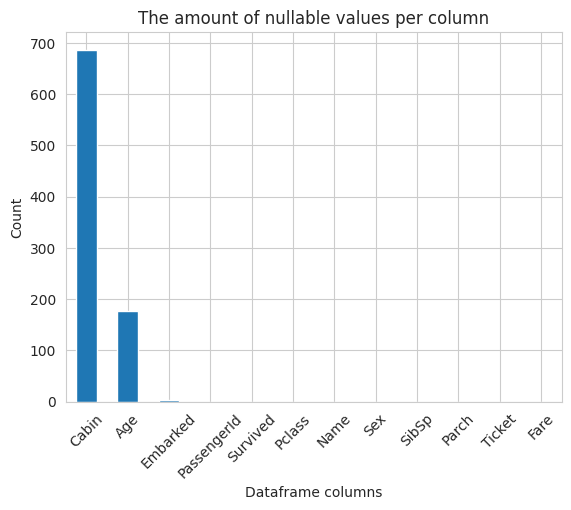

In [35]:
df.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)

plt.xlabel('Dataframe columns')
plt.ylabel('Count')
plt.title('The amount of nullable values per column')

plt.show()

*прокоментуйте отримані візуалізації

Власне, на цьому графіку відображаються наші NaN значення, які спочатку їх виводили в df.info()


5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

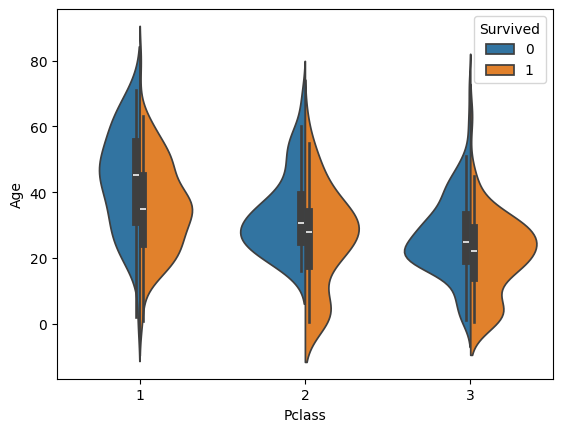

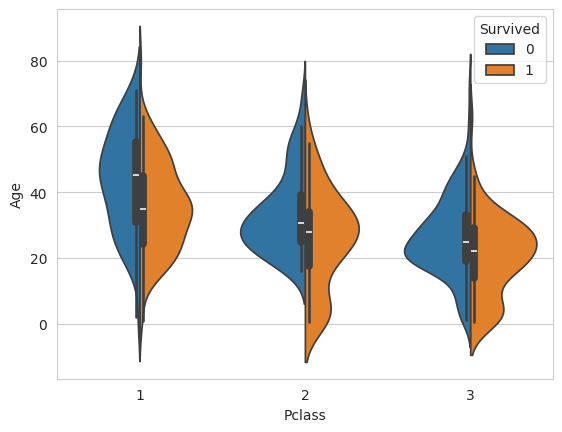

In [40]:
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True)
plt.show()

*прокоментуйте отримані візуалізації

violin plot показує схожі значення, як box plot, тільки додатково в нас додаються означення за вижившими/загиблими

отже, графік показує нам медіани віку людей, розподілених за класом, які вижили чи загинули

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


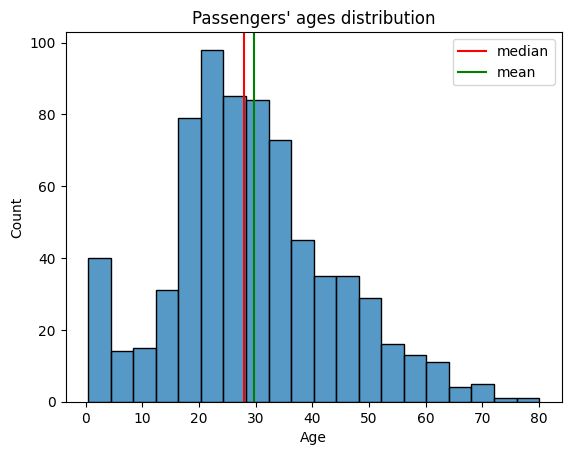

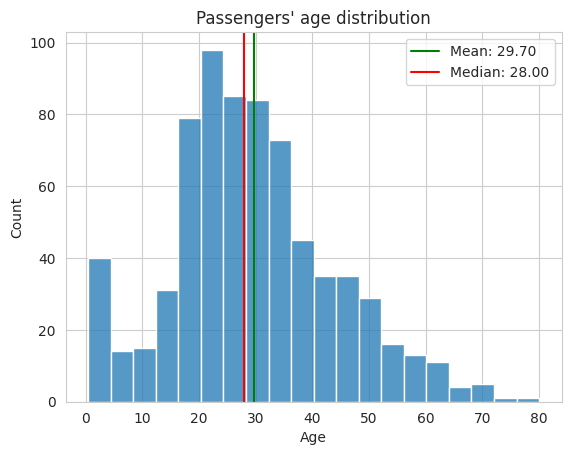

In [60]:
mean = df['Age'].mean()
median = df['Age'].median()
sns.histplot(data=df, x='Age')

plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='r', linestyle='-', label=f'Median: {median:.2f}')

plt.legend()
plt.title('Passengers\' age distribution')

plt.show()

*прокоментуйте отримані візуалізації

гістограма показує нам розподіл людей за віком, а також на графіку представлені с.а віку людей та медіана

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

- яка тоді була вартість квитків за класами?

- яка кількість(count) виживших за класом (барчарт)?

- який розподіл чоловіків та жінок за класом?

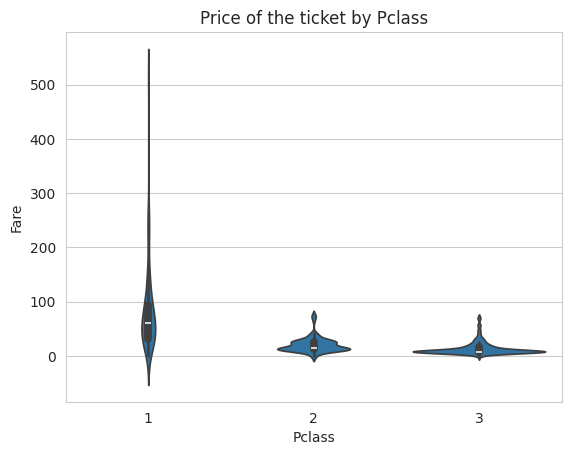

In [61]:
sns.violinplot(data=df, x="Pclass", y="Fare")
plt.title('Price of the ticket by Pclass')
plt.show()

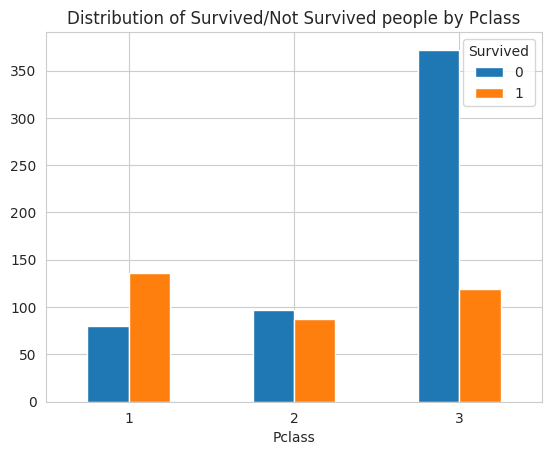

In [65]:
pd.crosstab(index=df['Pclass'], columns=df['Survived']).plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Distribution of Survived/Not Survived people by Pclass')
plt.show()

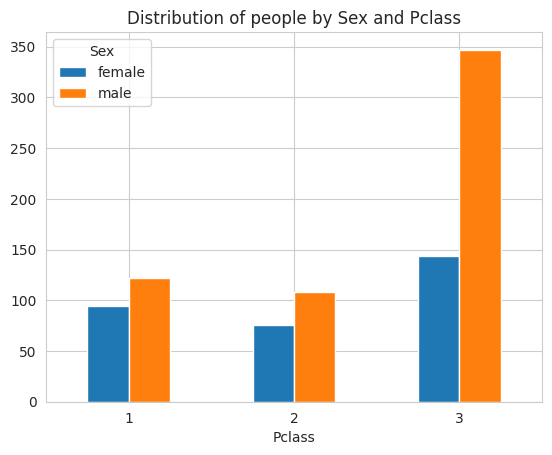

In [70]:
pd.crosstab(index=df['Pclass'], columns=df['Sex']).plot(kind='bar')

plt.xticks(rotation=0)

plt.title('Distribution of people by Sex and Pclass')
plt.show()

*прокоментуйте отримані візуалізації

було представлено три візуалізації:

1. Дана візуалізація показує нам ціни квитків за класом(Pclass) людей
2. Тут ми спостерігаємо кількість виживших/загиблих за класом(Pclass) людей
3. Ця візуалізація показує нам кількість людей за статтю та за класом

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

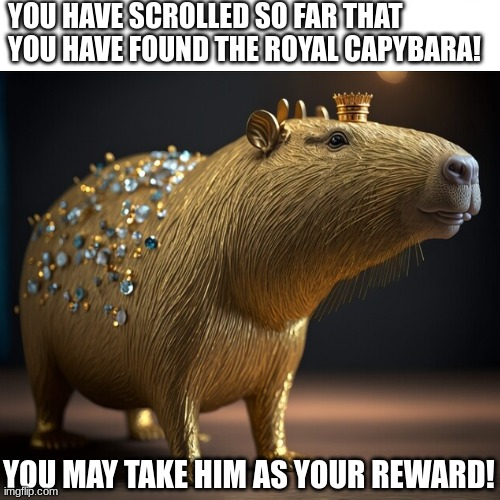